<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/05_mod_01_ap_sup_regressao_02_linear_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

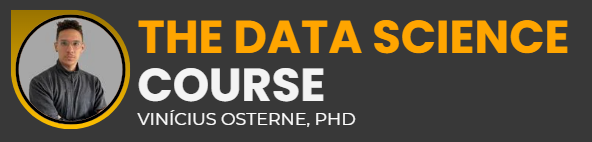

---

# Aprendizado Supervisionado - Modelos Baseados em Regressão

### Modelo de Regressão Linear Múltiplo

---

# Roteiro

- Conceituação

- Aplicação Prática

# Conceituação

## Motivação
- Modelo usado para **relacionar uma variável dependente quantitativa** com **duas ou mais variáveis independentes** (preditoras).
- Objetivo: prever a variável **resposta** a partir de múltiplos preditores.
- Resolve problemas de **previsão** e **entendimento da relação conjunta** entre a resposta e os preditores.
- Adequado quando se acredita que a resposta é influenciada por **vários fatores simultaneamente**.
- Exemplo: prever o preço de um imóvel com base em metragem, número de quartos e localização.

## Estrutura do Modelo
- Forma geral:
  $$
  Y_i = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + \beta_p X_{ip} + \varepsilon_i
  $$
- Componentes:
  - $Y_i$: resposta para a i-ésima observação.
  - $X_{ij}$: valor do j-ésimo preditor para a i-ésima observação.
  - $\beta_0$: intercepto (valor esperado de $Y$ quando todos os $X_j = 0$).
  - $\beta_j$: efeito médio no valor esperado de $Y$ para um aumento de 1 unidade em $X_j$, mantendo os demais preditores constantes.
  - $\varepsilon_i$: erro aleatório (média zero, variância constante).

## Suposições
- **Linearidade**: relação entre cada preditor e a resposta é linear (condicionalmente aos demais preditores).
- **Independência dos erros**: resíduos independentes.
- **Homoscedasticidade**: variância constante dos erros.
- **Normalidade dos erros**: $\varepsilon_i \sim N(0, \sigma^2)$ para inferência.
- **Ausência de multicolinearidade perfeita**: preditores não são combinações lineares exatas entre si.
- **Ausência de outliers influentes**.

## Estimação dos Parâmetros
- Método: **Mínimos Quadrados Ordinários (MQO)**.
- Objetivo: minimizar a soma dos quadrados dos resíduos:
  $$
  \min_{\beta_0, \beta_1, \dots, \beta_p} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2
  $$
  onde:
  $$
  \hat{Y}_i = \beta_0 + \beta_1 X_{i1} + \dots + \beta_p X_{ip}
  $$
- Forma matricial:
  $$
  \hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
  $$

## Inferência
- **Teste t para cada $\beta_j$**:
  - Hipóteses:
    - $H_0: \beta_j = 0$ → variável $X_j$ não contribui significativamente.
    - $H_1: \beta_j \neq 0$ → variável $X_j$ contribui significativamente.
  - Estatística:
    $$
    t = \frac{\hat{\beta}_j}{EP(\hat{\beta}_j)}
    $$
- **Intervalo de confiança**:
  $$
  \hat{\beta}_j \pm t_{\alpha/2, \, n-p-1} \cdot EP(\hat{\beta}_j)
  $$
- **Teste F global**:
  - Hipóteses:
    - $H_0$: $\beta_1 = \beta_2 = \dots = \beta_p = 0$
    - $H_1$: pelo menos um $\beta_j \neq 0$
  - Estatística:
    $$
    F = \frac{(SQ_{Reg}/p)}{(SQ_{Res}/(n-p-1))}
    $$

## Interpretação dos Parâmetros
- $\hat{\beta}_j > 0$: relação positiva entre $X_j$ e $Y$, mantendo os demais constantes.
- $\hat{\beta}_j < 0$: relação negativa entre $X_j$ e $Y$, mantendo os demais constantes.
- $\hat{\beta}_0$: valor esperado de $Y$ quando todos os preditores são zero (interpretar com cuidado).
- Importante considerar **magnitude**, **sinal** e **significância estatística** no contexto do problema.

## Diagnóstico
- Linearidade e Homocedasticidade.
- Normalidade dos erros.
- Independência dos erros.
- Multicolinearidade (VIF - Variance Inflation Factor).
- Observações influentes (Distância de Cook, leverage).
- Medidas de ajuste:
  - $R^2$ e $R^2_{ajustado}$
  - Erro padrão da estimativa


---

# Aplicação

In [ ]:
# Sobre a base de dados

## Reference: Efron, B., Hastie, T., Johnstone, I., Tibshirani, R. (2004). Least Angle Regression. Annals of Statistics, 32(2), 407–499
## Disponível: load_diabetes() se usar scikit-learn e lars se usar R
## Objetivo do estudo: Prever a progressão da doença relacionada ao diabetes após um ano, com base em variáveis clínicas e bioquímicas medidas no momento inicial
## Dados coletados de **442 pacientes** com as seguintes variáveis:
  ### disease_progression: medida quantitativa da evolução da doença após um ano.
  ### bmi: índice de massa corporal (normalizado).
## Razão da escolha: variável contínua fortemente associada a riscos de diabetes, intuitiva para interpretação.

In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd
import statsmodels.api as sm

In [ ]:
# ============================================================
# Carregando dados
# ============================================================

In [6]:
data = load_diabetes(as_frame=True)
df = data.frame.copy()              # inclui X e y
X = df.drop(columns=["target"])
y = df["target"].rename("disease_progression")

In [8]:
# Estatísticas descritivas
print(df.describe().round(3))

           age      sex      bmi       bp       s1       s2       s3       s4  \
count  442.000  442.000  442.000  442.000  442.000  442.000  442.000  442.000   
mean    -0.000    0.000   -0.000   -0.000   -0.000    0.000   -0.000   -0.000   
std      0.048    0.048    0.048    0.048    0.048    0.048    0.048    0.048   
min     -0.107   -0.045   -0.090   -0.112   -0.127   -0.116   -0.102   -0.076   
25%     -0.037   -0.045   -0.034   -0.037   -0.034   -0.030   -0.035   -0.039   
50%      0.005   -0.045   -0.007   -0.006   -0.004   -0.004   -0.007   -0.003   
75%      0.038    0.051    0.031    0.036    0.028    0.030    0.029    0.034   
max      0.111    0.051    0.171    0.132    0.154    0.199    0.181    0.185   

            s5       s6   target  
count  442.000  442.000  442.000  
mean     0.000    0.000  152.133  
std      0.048    0.048   77.093  
min     -0.126   -0.138   25.000  
25%     -0.033   -0.033   87.000  
50%     -0.002   -0.001  140.500  
75%      0.032    0.028  

In [9]:
# Correlação
corr = df[["target", "age"]].corr().iloc[0, 1]
corr

np.float64(0.1878887507189197)

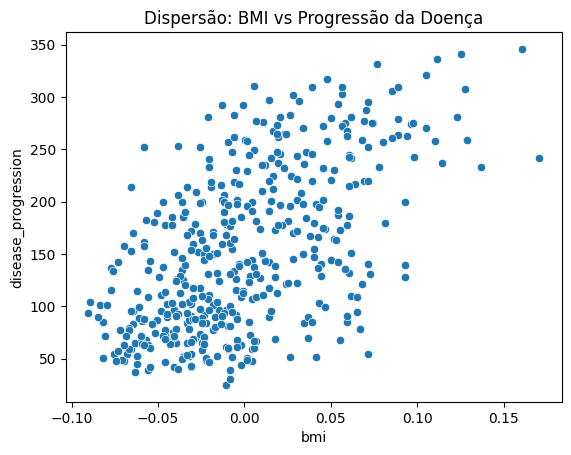

In [ ]:
# Dispersão
sns.scatterplot(x="bmi", y="disease_progression", data=df)
plt.title("Dispersão: BMI vs Progressão da Doença")
plt.show()

In [ ]:
# ============================================================
# Ajuste do modelo (OLS via fórmula)
# ============================================================

In [10]:
X_const = sm.add_constant(X)        # adiciona intercepto
modelo = sm.OLS(y, X_const).fit()

In [11]:
print(modelo.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Tue, 12 Aug 2025   Prob (F-statistic):           3.83e-62
Time:                         22:47:36   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.06

In [12]:
coef_df = pd.DataFrame({
    "variavel": ["Intercepto"] + list(X.columns),
    "beta_hat": modelo.params.values,
    "p_valor": modelo.pvalues.values
}).sort_values("beta_hat", key=abs, ascending=False)

print("\nCoeficientes ordenados por magnitude absoluta:")
print(coef_df)


Coeficientes ordenados por magnitude absoluta:
      variavel    beta_hat        p_valor
5           s1 -792.175639   5.794761e-02
9           s5  751.273700   1.555899e-05
3          bmi  519.845920   4.296391e-14
6           s2  476.739021   1.603902e-01
4           bp  324.384646   1.024278e-06
2          sex -239.815644   1.041671e-04
8           s4  177.063238   2.734587e-01
0   Intercepto  152.133484  1.010082e-208
7           s3  101.043268   6.347233e-01
10          s6   67.626692   3.059895e-01
1          age  -10.009866   8.670306e-01


In [ ]:
# ============================================================
# Diagnóstico do modelo
# ============================================================

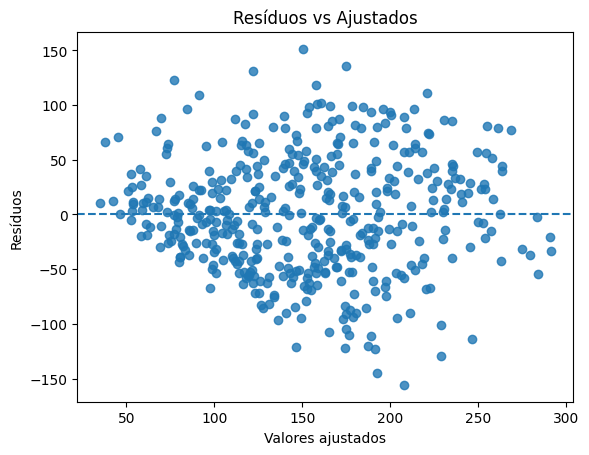

In [15]:
# ================================================================
# Análise: Resíduos vs Ajustados
# Objetivo: verificar se o modelo captura adequadamente a relação linear
#            e se a variância dos erros é constante (homoscedasticidade).
# Comportamentos esperados:
# - Dispersão aleatória dos pontos ao redor da linha horizontal em zero.
# - Ausência de padrões sistemáticos (curvas, funis).
# Comportamentos não esperados:
# - Padrão curvo → indício de não-linearidade.
# - Funil (aumento/diminuição da dispersão) → heterocedasticidade.
# - Agrupamentos ou lacunas → possível omissão de variáveis ou erro de especificação.
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(fitted, resid, alpha=0.8)
plt.axhline(0, linestyle='--')
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Ajustados")
plt.show()

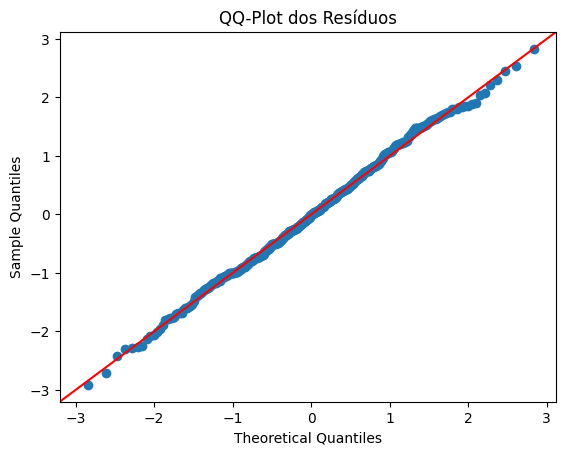

In [17]:
# ================================================================
# Análise: QQ-Plot dos Resíduos
# Objetivo: avaliar a suposição de normalidade dos erros.
# Comportamentos esperados:
# - Pontos próximos à linha reta de 45°.
# - Pequenos desvios nas extremidades são aceitáveis.
# Comportamentos não esperados:
# - Caudas muito afastadas → distribuições com mais/menos cauda que a normal.
# - Desvios sistemáticos → não normalidade, assimetria.
sm.qqplot(resid, line='45', fit=True)
plt.title("QQ-Plot dos Resíduos")
plt.show()


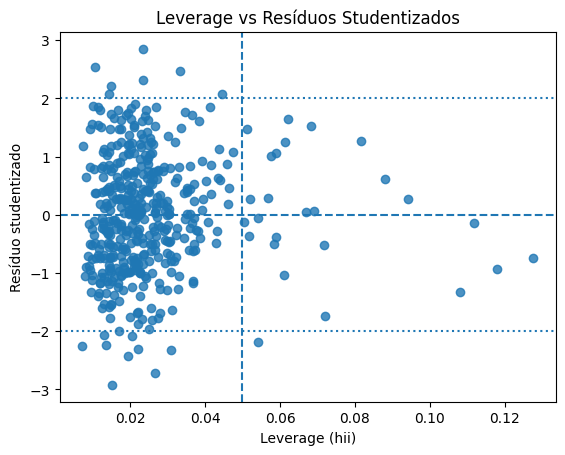

In [18]:
# ================================================================
# Análise: Leverage vs Resíduos Studentizados
# Objetivo: identificar observações influentes ou com alta alavancagem.
# Comportamentos esperados:
# - Maioria das observações com leverage < 2p/n e Cook's D < 4/n.
# - Resíduos studentizados entre -2 e +2 para a maioria dos pontos.
# Comportamentos não esperados:
# - Pontos com leverage alto e resíduos grandes → influentes.
# - Cook's D muito alto → possível outlier influente.
plt.figure()
plt.scatter(leverage, std_resid, alpha=0.8)
plt.xlabel("Leverage (hii)")
plt.ylabel("Resíduo studentizado")
plt.title("Leverage vs Resíduos Studentizados")
plt.axhline(0, linestyle='--')
plt.axvline(levg_cut, linestyle='--')
plt.axhline(2, linestyle=':')
plt.axhline(-2, linestyle=':')
plt.show()


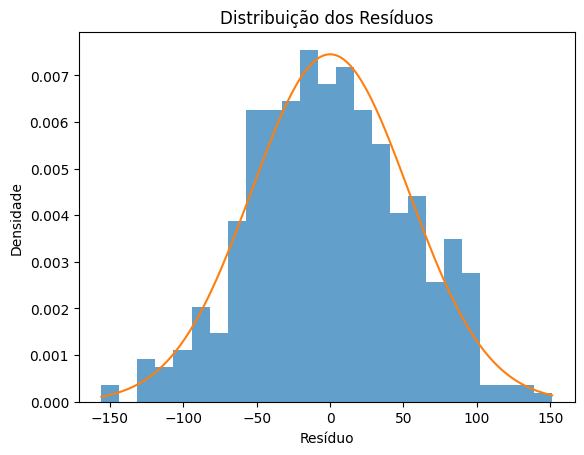

In [24]:
# ================================================================
# Análise: Histograma dos Resíduos
# Objetivo: inspecionar a distribuição dos resíduos em relação à normal.
# Comportamentos esperados:
# - Distribuição aproximadamente simétrica e centrada em zero.
# - Forma semelhante à curva normal ajustada.
# Comportamentos não esperados:
# - Assimetria pronunciada → pode indicar transformação necessária.
# - Curtose alta/baixa → caudas mais pesadas ou mais leves que a normal.

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mu_hat = np.mean(resid)
sd_hat = np.std(resid, ddof=1)
xs = np.linspace(resid.min(), resid.max(), 200)

plt.figure()
plt.hist(resid, bins=25, density=True, alpha=0.7)
plt.plot(xs, norm.pdf(xs, loc=mu_hat, scale=sd_hat))
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Densidade")
plt.show()


In [20]:
# ================================================================
# Análise: Teste de Breusch-Pagan
# Objetivo: verificar formalmente se há heterocedasticidade.
# Comportamentos esperados:
# - p-valor alto → não rejeita homoscedasticidade.
# Comportamentos não esperados:
# - p-valor baixo (<0.05) → evidência de heterocedasticidade.
from statsmodels.stats.diagnostic import het_breuschpagan
bp_lm, bp_pval, fval, f_pval = het_breuschpagan(resid, X_const)
print(f"Breusch-Pagan: LM={bp_lm:.3f}, p-valor(LM)={bp_pval:.4f}, F={fval:.3f}, p-valor(F)={f_pval:.4f}")

Breusch-Pagan: LM=26.145, p-valor(LM)=0.0035, F=2.710, p-valor(F)=0.0031


In [21]:
# ================================================================
# Análise: Teste de Durbin-Watson
# Objetivo: avaliar autocorrelação dos resíduos.
# Comportamentos esperados:
# - Valor próximo de 2 → pouca ou nenhuma autocorrelação.
# Comportamentos não esperados:
# - Valor < 1.5 → autocorrelação positiva.
# - Valor > 2.5 → autocorrelação negativa.
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(resid)
print(f"Durbin-Watson: {dw:.3f}")

Durbin-Watson: 2.029


In [22]:
# ================================================================
# Análise: VIF (Variance Inflation Factor)
# Objetivo: verificar presença de multicolinearidade.
# Comportamentos esperados:
# - VIF entre 1 e 5 → aceitável.
# Comportamentos não esperados:
# - VIF > 10 → alerta de multicolinearidade forte.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame({
    "variavel": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_df.sort_values("VIF", ascending=False))

  variavel        VIF
4       s1  59.202510
5       s2  39.193370
6       s3  15.402156
8       s5  10.075967
7       s4   8.890986
2      bmi   1.509437
9       s6   1.484623
3       bp   1.459428
1      sex   1.278071
0      age   1.217307


In [23]:
# ================================================================
# Análise: Teste de Outliers (Bonferroni)
# Objetivo: detectar observações com resíduos anormais.
# Comportamentos esperados:
# - Poucos ou nenhum ponto com p-valor < 0.05 (após Bonferroni).
# Comportamentos não esperados:
# - Muitas observações significativas → possível problema no ajuste ou dados.
from statsmodels.stats.outliers_influence import outlier_test
ot = outlier_test(modelo, method='bonf')
outliers = ot[ot['bonf(p)'] < 0.05]
print(outliers)

Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []
